In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Download the Data

In [2]:
sales1 = pd.read_csv('sales1.csv', index_col=None)
sales1.head()

,Book title,Number sold,Sales price,Royalty paid
0,The Bricklayer’s Bible,8,2.99,0.55
1,Swimrand,2,1.99,0.35
2,Pining For The Fisheries of Yore,28,2.99,0.55
3,The Duck Goes Here,34,2.99,0.55
4,The Tower Commission Report,4,11.50,4.25


In [3]:
sales2 = pd.read_csv('sales2.csv', index_col=None)
sales2.head()

,Title,Units sold,List price,Royalty
0,NaN,NaN,NaN,NaN
1,Sales report for Q4,NaN,NaN,NaN
2,E-Book Reader US Store,NaN,NaN,NaN
3,Pining for the Fisheries of Yore,80.0,3.50,14.98
4,Swimrand,1.0,2.99,0.14


## Challenge:
1. Combine these two sales CSV together into a single dataframe.
2. Then compute how much money consumers spent on each book in each currency.

##### Notes:

- First table is in USD
- Second table actually consists of 3 smaller tables. First 9 rows are for USD, next 8 rows are for GBP, and final 7 are for EUR.

### 1. Explore the Data

In [4]:
# Check the size of each dataframe

print(sales1.shape)
print(sales2.shape)

(5, 4)
(24, 4)


In [5]:
# Check for null values

sales1.isnull().sum()

Book title      0
Number sold     0
Sales price     0
Royalty paid    0
dtype: int64

In [6]:
sales2.isnull().sum()

Title          5
Units sold    14
List price    14
Royalty       11
dtype: int64

In [7]:
# Split sales2 df into 3 different tables for the corresponding currencies

sales2_USD = sales2[:9]
sales2_GB = sales2[9:17]
sales2_EU = sales2[17:]

In [8]:
# Convert GB and EU into USD prices. Round to 2 decimal places

sales2_GB.loc[:, ('List price', 'Royalty')] = (sales2_GB.loc[:,('List price', 'Royalty')]*1.2).round(decimals=2)
sales2_EU.loc[:, ('List price', 'Royalty')] = (sales2_EU.loc[:, ('List price', 'Royalty')]*1.07).round(decimals=2)

/var/folders/cl/dg9768bj6ys0prn_4p_bbftw0000gn/T/ipykernel_50678/1577130197.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales2_GB.loc[:, ('List price', 'Royalty')] = (sales2_GB.loc[:,('List price', 'Royalty')]*1.2).round(decimals=2)
/var/folders/cl/dg9768bj6ys0prn_4p_bbftw0000gn/T/ipykernel_50678/1577130197.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales2_EU.loc[:, ('List price', 'Royalty')] = (sales2_EU.loc[:, ('List price', 'Royalty')]*1.07).round(decimals=2)


In [9]:
# Concatenate the three dataframes along the 0th axis

sales2 = pd.concat([sales2_USD, sales2_GB, sales2_EU], axis=0)
sales2

,Title,Units sold,List price,Royalty
0,NaN,NaN,NaN,NaN
1,Sales report for Q4,NaN,NaN,NaN
2,E-Book Reader US Store,NaN,NaN,NaN
3,Pining for the Fisheries of Yore,80.0,3.50,14.98
4,Swimrand,1.0,2.99,0.14
5,The Bricklayer's Bible,17.0,3.50,5.15
6,The Duck Goes Here,34.0,2.99,5.78
7,The Tower Commission Report,4.0,9.50,6.20
8,US royalties (USD),NaN,NaN,32.25
9,NaN,NaN,NaN,NaN


In [10]:
# Drop rows with null values across the three rows

sales2.dropna(axis=0, subset=['Royalty'], inplace=True)

In [11]:
sales2.rename(columns={'Title': 'Book title',
                        'Units sold': 'Number sold',
                        'List price': 'Sales price',
                        'Royalty': 'Royalty paid'
                       }, inplace=True
              )

# Concatenate the two final dataframes into one along the 0th axis

sales = pd.concat([sales1, sales2], axis=0)

In [12]:
# Reset the index and drop the old index row.

sales = sales.reset_index().drop(['index'], axis=1)

In [13]:
sales

,Book title,Number sold,Sales price,Royalty paid
0,The Bricklayer’s Bible,8.0,2.99,0.55
1,Swimrand,2.0,1.99,0.35
2,Pining For The Fisheries of Yore,28.0,2.99,0.55
3,The Duck Goes Here,34.0,2.99,0.55
4,The Tower Commission Report,4.0,11.50,4.25
5,Pining for the Fisheries of Yore,80.0,3.50,14.98
6,Swimrand,1.0,2.99,0.14
7,The Bricklayer's Bible,17.0,3.50,5.15
8,The Duck Goes Here,34.0,2.99,5.78
9,The Tower Commission Report,4.0,9.50,6.20


The 5 books in the sales1 dataframe show up again in the sales2 dataframe under the USD rows, but with different prices. We can assume that these were still sold in USD, but perhaps on a discount. I will add the numbers sold from sales1 to the American rows of sales 2.

In [14]:
# Separate the 3 dataframes again by Country

US_sales = sales[:11]
GB_sales = sales[11:15]
EU_sales = sales[15:]

In [15]:
US_sales.groupby('Book title').sum()

,Number sold,Sales price,Royalty paid
Book title,,,
Pining For The Fisheries of Yore,28.0,2.99,0.55
Pining for the Fisheries of Yore,80.0,3.50,14.98
Swimrand,3.0,4.98,0.49
The Bricklayer's Bible,17.0,3.50,5.15
The Bricklayer’s Bible,8.0,2.99,0.55
The Duck Goes Here,68.0,5.98,6.33
The Tower Commission Report,8.0,21.00,10.45
US royalties (USD),0.0,0.00,32.25


In [16]:
# Create a revenue column that multiplies the Numbers sold with the corresponding sales price

US_sales['Revenue'] = (US_sales['Number sold'] * US_sales['Sales price'])
US_sales

/var/folders/cl/dg9768bj6ys0prn_4p_bbftw0000gn/T/ipykernel_50678/1640255708.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  US_sales['Revenue'] = (US_sales['Number sold'] * US_sales['Sales price'])


,Book title,Number sold,Sales price,Royalty paid,Revenue
0,The Bricklayer’s Bible,8.0,2.99,0.55,23.92
1,Swimrand,2.0,1.99,0.35,3.98
2,Pining For The Fisheries of Yore,28.0,2.99,0.55,83.72
3,The Duck Goes Here,34.0,2.99,0.55,101.66
4,The Tower Commission Report,4.0,11.50,4.25,46.00
5,Pining for the Fisheries of Yore,80.0,3.50,14.98,280.00
6,Swimrand,1.0,2.99,0.14,2.99
7,The Bricklayer's Bible,17.0,3.50,5.15,59.50
8,The Duck Goes Here,34.0,2.99,5.78,101.66
9,The Tower Commission Report,4.0,9.50,6.20,38.00


In [17]:
US_sales.sort_values('Book title')

,Book title,Number sold,Sales price,Royalty paid,Revenue
2,Pining For The Fisheries of Yore,28.0,2.99,0.55,83.72
5,Pining for the Fisheries of Yore,80.0,3.50,14.98,280.00
1,Swimrand,2.0,1.99,0.35,3.98
6,Swimrand,1.0,2.99,0.14,2.99
7,The Bricklayer's Bible,17.0,3.50,5.15,59.50
0,The Bricklayer’s Bible,8.0,2.99,0.55,23.92
3,The Duck Goes Here,34.0,2.99,0.55,101.66
8,The Duck Goes Here,34.0,2.99,5.78,101.66
4,The Tower Commission Report,4.0,11.50,4.25,46.00
9,The Tower Commission Report,4.0,9.50,6.20,38.00


In [18]:
# Sort values by book title, get the revenue and skip over every second row starting from 0th position

US_sales1 = US_sales.sort_values('Book title')['Revenue'][:-1:2].reset_index()

# Sort values by book title, get the revenue and skip over every second row starting from 1st position

US_sales2 = US_sales.sort_values('Book title')['Revenue'][1::2].reset_index()

# Drop redundant index columns after index resets

US_sales1 = US_sales1.drop(['index'], axis=1)
US_sales2 = US_sales2.drop(['index'], axis=1)

# Add the two revenues up for the same books that were sold in USD but were sold at different prices

US_sales_final = US_sales1 + US_sales2

In [19]:
# Sort the values again by book title to re-join the book titles with the revenues dataframe

US_books = US_sales.sort_values('Book title')[:-1:2]['Book title']
US_books = US_books.reset_index().drop(['index'], axis=1)

In [ ]:
# Place the book titles at the beginning of the dataframe

idx=0
new_col=US_books


US_sales_final.insert(loc=idx, column='Book title', value=new_col)

In [29]:
US_sales_final

,Book title,Revenue
0,Pining For The Fisheries of Yore,363.72
1,Swimrand,6.97
2,The Bricklayer's Bible,83.42
3,The Duck Goes Here,203.32
4,The Tower Commission Report,84.00


In [21]:
# Perform the same multiplication of Q * P in the GB and EU dataframes

GB_sales['Revenue'] = GB_sales['Number sold'] * GB_sales['Sales price']
EU_sales['Revenue'] = EU_sales['Number sold'] * EU_sales['Sales price']

/var/folders/cl/dg9768bj6ys0prn_4p_bbftw0000gn/T/ipykernel_50678/1007799151.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GB_sales['Revenue'] = GB_sales['Number sold'] * GB_sales['Sales price']
/var/folders/cl/dg9768bj6ys0prn_4p_bbftw0000gn/T/ipykernel_50678/1007799151.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EU_sales['Revenue'] = EU_sales['Number sold'] * EU_sales['Sales price']


In [30]:
# Filter for relevant columns

GB_sales = GB_sales[['Book title', 'Revenue']]
EU_sales = EU_sales[['Book title', 'Revenue']]

In [34]:
# Create a new column with country names

US_sales_final['country'] = 'United States'
GB_sales['country'] = 'Great Britain'
EU_sales['country'] = 'France'

/var/folders/cl/dg9768bj6ys0prn_4p_bbftw0000gn/T/ipykernel_50678/3103376311.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GB_sales['country'] = 'Great Britain'


In [36]:
# Concatenate the final dataframe

final_sales = pd.concat([US_sales_final, GB_sales, EU_sales], axis=0)
final_sales

,Book title,Revenue,country
0,Pining For The Fisheries of Yore,363.72,United States
1,Swimrand,6.97,United States
2,The Bricklayer's Bible,83.42,United States
3,The Duck Goes Here,203.32,United States
4,The Tower Commission Report,84.00,United States
11,Pining for the Fisheries of Yore,168.73,Great Britain
12,The Bricklayer's Bible,61.03,Great Britain
13,The Tower Commission Report,31.20,Great Britain
14,UK royalties (GBP),NaN,Great Britain
15,Swimrand,17.04,France


<AxesSubplot: xlabel='country'>

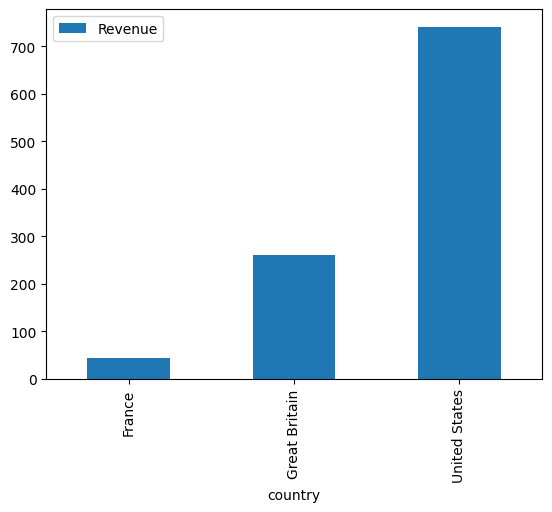

In [38]:
# Get a simple bar chart showing the revenue from each country

final_sales.groupby('country').sum().plot(kind='bar')

In [51]:
# Replace spelling difference in Fisheries book so as to be able to group it with its counterpart

final_sales['Book title'] = final_sales['Book title'].replace('Pining for the Fisheries of Yore', 'Pining For The Fisheries of Yore')

In [61]:
# Drop the null values of GB and EU Royalties

final_sales = final_sales.dropna()

<AxesSubplot: ylabel='Book title'>

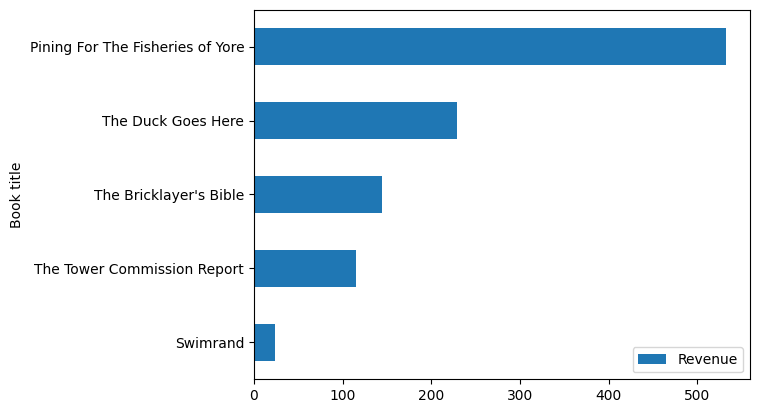

In [62]:
# Plot a horizontal bar chart showing the revenues and the book titles

final_sales.groupby('Book title').sum().sort_values('Revenue').plot(kind='barh')

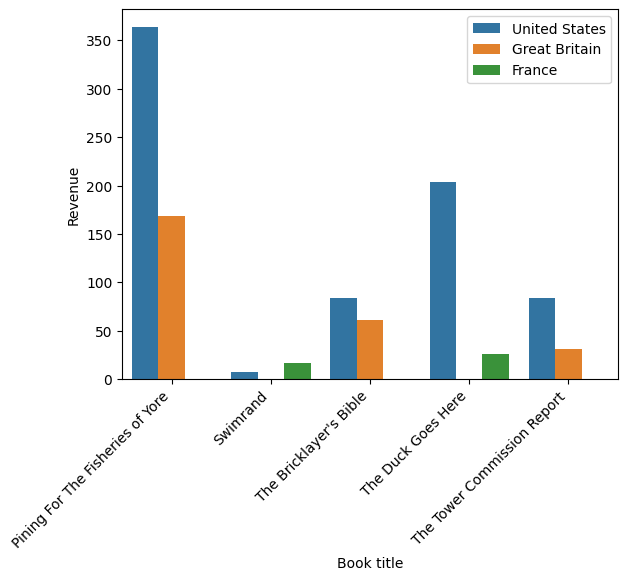

In [75]:
# Plot a bar chart with Revenue on the y-axis, book title on the x-axis, and colours separated by country

sns.barplot(data=final_sales, x='Book title', y='Revenue', hue='country')
plt.xticks(rotation=45, ha='right')
plt.legend(loc = 'upper right')